<a href="https://colab.research.google.com/github/Tmills1/Data-Science-Final-Assessment-/blob/main/Final_Review(with_solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
BEGIN ASSIGNMENT
generate: true
files:
    - california_housing.csv
    - loan_default.csv
```


# College Advantage (Foundations of Data Science) Final Assessment

In this assessment, you will explore the fundamental concepts and techniques used in data visualization, hypothesis testing, regression analysis and classification. These statistical methods play a crucial role in understanding relationships between variables, making predictions, and drawing conclusions from data. Throughout this exercise, you will have the opportunity to apply your knowledge, critical thinking, and analytical skills to solve various problems and interpret statistical results. Good luck, and let's begin this journey !

In this assessment, you will investigate two problems, house price estimation and loan default tendencies.

Here is a roadmap for this project:

* In Part 1, You will explore the housing dataand assess the validity of a several claims partaining to housing prices in california. You will also be required to determine whether there is enough evidence to support or reject these claims.
* In Part 2, Given the california housing dataset, you will be required to build a regression model to predict the average price of houses.
* In Part 3, you will look at a case study of loan default prediction, you will apply hypothesis testing to evaluate the validity of various claims related to loan defaulters. Your task will be to determine if there is sufficient evidence to support or reject these claims based on the available data.
* In Part 4, Given the loan default dataset, you will be required to build a k-Nearest Neighbors classifier to predict the tendency of a customer defaulting on loan payment.

Let's begin by mounting our drive. This will help us retrieve the necessary dataset from our google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.chdir("/content/drive/MyDrive/InclusionBridgeMasterFolder/CollegeAdvantageMaterials/CA 2023/InclusionBridgePrepResources/Coaches/datasets")
os.chdir("/content/drive/MyDrive/InclusionBridgePrepResources/Coaches/datasets")

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Part 1: Regression Analysis: A Case study of house prices in California.

Housing has been a topic of concern for all Californians due to the rising prices. It leads to the question: why are homes in California so expensive?

The California Housing Dataset uses information from the 1990 census. We may be able to use the data to develop insight into how housing value is distributed throughout California. The data set contains 10 features of 11,496 observations. Each observation is a single block within California.

All of the features are quantitative aside from ocean_proximity, which is an categorical variable containing three classes: `INLAND`, `NEAR BAY`, and `NEAR OCEAN`. The data to be used in this section pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The features in the housing dataset include:

- **longitude**: A measure of how far west a house is; a higher value is farther west.

- **latitude**: A measure of how far north a house is; a higher value is farther north.

- **housing_median_age**: Median age of a house within a block; a lower number is a newer building.

- **total_rooms**: Total number of rooms within a block.

- **total_bedrooms**: Total number of bedrooms within a block.

- **population**: Total number of people residing within a block.

- **households**: Total number of households, a group of people residing within a home unit, for a block.

- **median_income**: Median income for households within a block of houses (measured in tens of thousands of US Dollars).

- **median_house_value**: Median house value for households within a block (measured in US Dollars).

- **ocean_proximity**: Location of the house with respect to the ocean/sea

Let's start by reading the housing dataset.

In [ ]:
housing_data = pd.read_csv('california_housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exercise 1: Data Cleaning
Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It is a crucial step in data preprocessing, especially when working with large and complex datasets. In this section, you will search for inconsistencies in your data and handle them appropriately.

**Exercise 1.1:** Investigate the nature of your data, are there missing values in the dataset? If there are, how many missing values are there in the each column?

In [ ]:
# Your solution here
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        105
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Exercise 1.2:** Replace the missing values with the median for each of the columns that you have identified.

In [ ]:
# Your solution here
median_ = housing_data["total_bedrooms"].median()
housing_data["total_bedrooms"] = housing_data["total_bedrooms"].fillna(median_)

## Exercise 2: Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a preliminary approach to analyzing and summarizing datasets to gain insights and understanding. It involves examining and visualizing the data to discover patterns, relationships, and anomalies. EDA is typically performed before formal statistical modeling or hypothesis testing and helps in formulating research questions and hypotheses. Overall, Exploratory Data Analysis helps in understanding the nature of the data, identifying key variables and trends, and formulating initial hypotheses or research directions. It provides an essential foundation for further analysis and decision-making.

**Exercise 2.2:** Identify the numerical and categorical variables in the dataset.

In [ ]:
#Get numerical columns
housing_data.select_dtypes(include=np.number).columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
#Get categorical columns
housing_data.select_dtypes(include="object").columns.tolist()

['ocean_proximity']

**Exercise 2.2:** One of the aim of EDA is to summarize the main characteristics and properties of the dataset. This involves calculating descriptive statistics such as mean, median, standard deviation, and quartiles for numerical variables. Check the statistical summary of your data. Are there things that you observe?

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000
mean,-120.143816,36.483990,28.125228,2642.119315,530.135403,1350.476215,485.172450,3.585131,180380.192104
std,2.110753,2.199755,13.261344,2198.669531,414.308390,1082.478529,373.674284,1.764025,115590.248346
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000
25%,-122.100000,34.130000,17.000000,1436.500000,292.000000,730.000000,269.000000,2.368550,94200.000000
50%,-120.930000,37.460000,27.000000,2144.000000,431.000000,1105.000000,400.000000,3.256000,143200.000000
75%,-118.020000,37.970000,37.000000,3153.000000,640.000000,1631.000000,593.000000,4.366250,234350.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


**Exercise 2.3: Correlation Analysis**

Correlation analysis can provide insights into the strength and direction of relationships, but it does not imply causation. It only captures the linear association between variables, not necessarily the underlying mechanisms or causal links. For the numerical features in the dataset, we are interested in seeing how correlated they are with the `median_house_value` feature.

In [ ]:
correlation_matrix = housing_data.corr()
correlation_matrix['median_house_value']

<ipython-input-11-d3cc576888e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


longitude            -0.189600
latitude             -0.061939
housing_median_age    0.188527
total_rooms           0.117423
total_bedrooms        0.049345
population           -0.016678
households            0.067648
median_income         0.682785
median_house_value    1.000000
Name: median_house_value, dtype: float64

**Exercise 2.4:** Visualize a correlation heatmap showing the pairwise correlation of each numerical variable in the dataset.

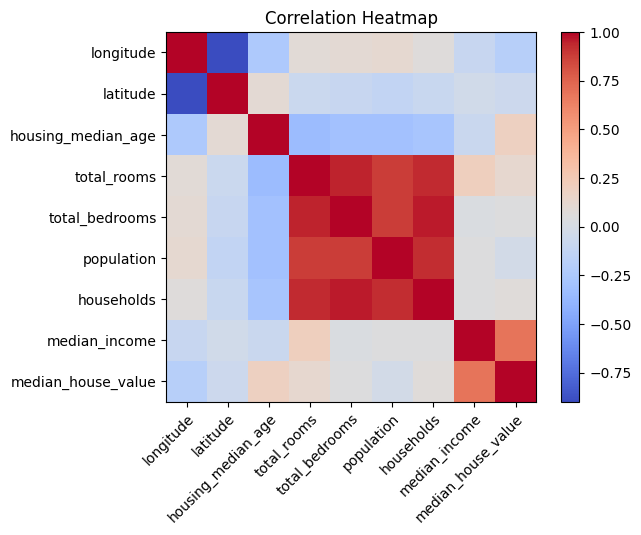

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
cbar = fig.colorbar(heatmap)

# Set x and y axis labels
ax.set_xticks(np.arange(correlation_matrix.shape[0]))
ax.set_yticks(np.arange(correlation_matrix.shape[1]))

#Pass in the column names of the correlation matrix as the ticklabels
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set the title
ax.set_title("Correlation Heatmap")

# Display the heatmap
plt.show()

What can you deduce for the correlation heatmap?

**Exercise 2.5:** It is believed that there exists a strong positive correlation between `households` and `total_bedrooms`. Investigate this using a scatterplot.

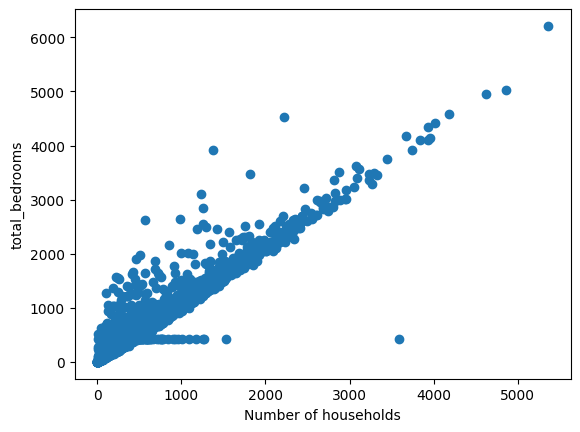

In [ ]:
plt.scatter(housing_data['households'], housing_data['total_bedrooms'])
plt.xlabel('Number of households')
plt.ylabel('total_bedrooms')
plt.show()

**Exercise 2.6:** There are a number of categories in the `ocean_proximity` variable. Can you investigate the frequency of each category using a frequency table and barplot.

In [ ]:
proximity_frequency_table = housing_data['ocean_proximity'].value_counts()
proximity_frequency_table

INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

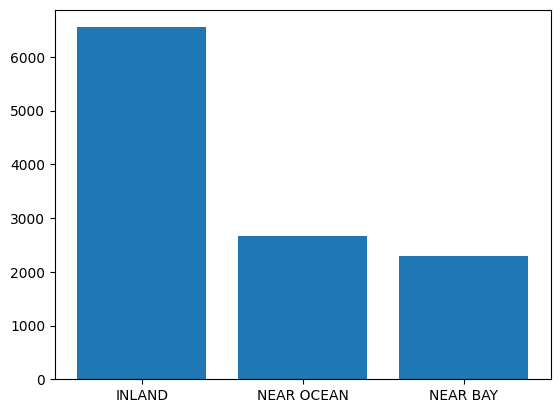

In [ ]:
frequency = proximity_frequency_table.values
proximity_categories = proximity_frequency_table.index.values

#Make bar plot
plt.bar(proximity_categories, frequency)
plt.show()

**Exercise 2.7:** From the statistical summary you investigated earlier, it appears that  `total_rooms`, `households`, and `population` contain a number of outliers. Can you investigate this using boxplots and histogram.

For clarity create a  grid of plot (subplots) for each variable. Place the histogram and boxplot on the same figure.

**Exercise 2.7.1:** Total_rooms



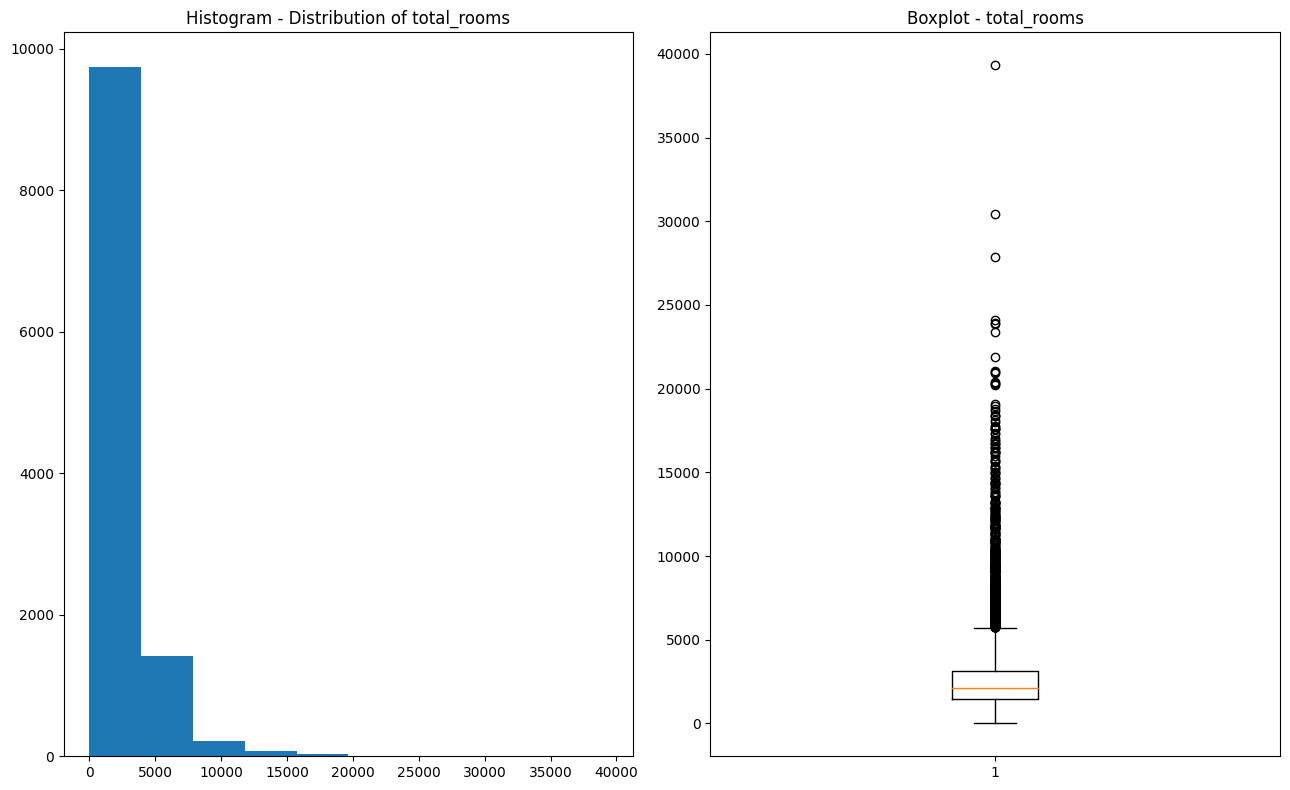

In [ ]:
#make them a subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
ax[0].hist(housing_data['total_rooms'])
ax[1].boxplot(housing_data['total_rooms'])

#Let's add their respective titles.
ax[0].set_title("Histogram - Distribution of total_rooms")
ax[1].set_title("Boxplot - total_rooms")

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()


**Exercise 2.7.2:** households



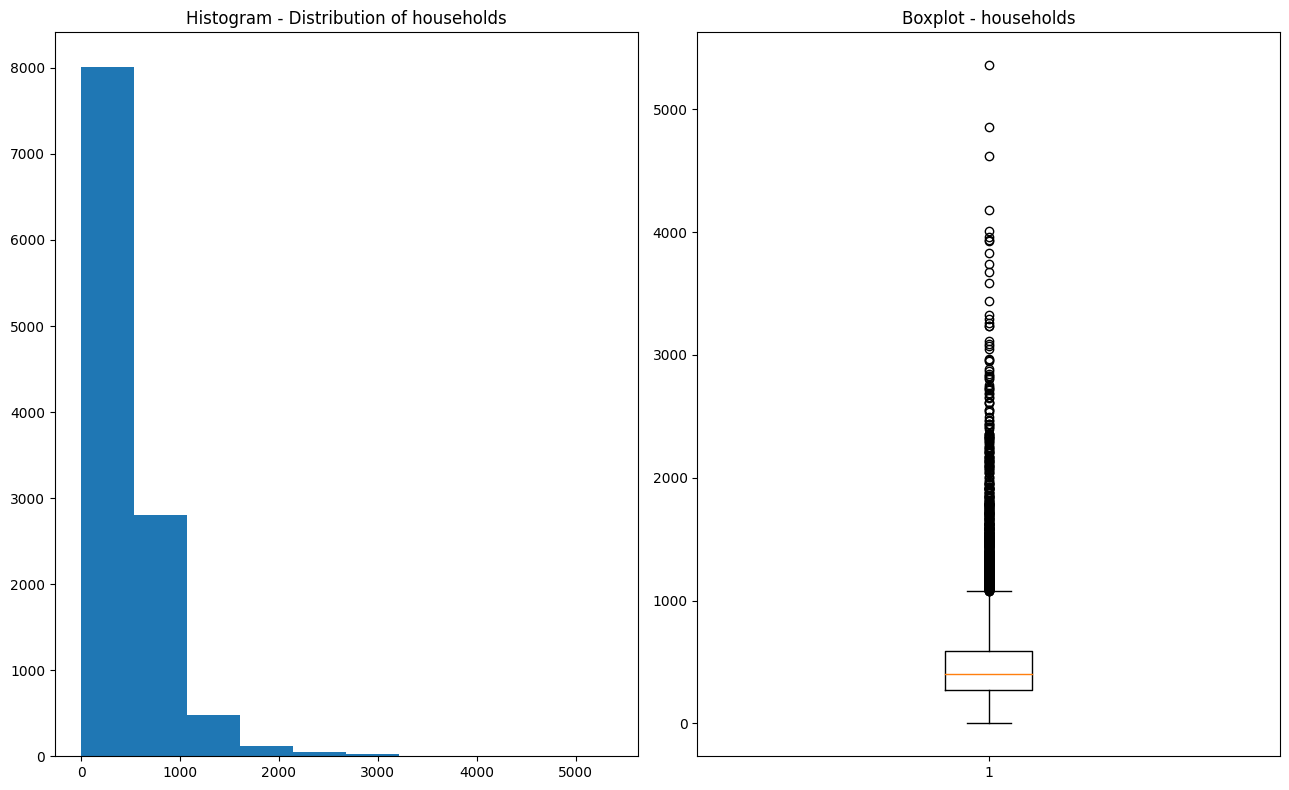

In [ ]:
#make them a subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
ax[0].hist(housing_data['households'])
ax[1].boxplot(housing_data['households'])

#Let's add their respective titles.
ax[0].set_title("Histogram - Distribution of households")
ax[1].set_title("Boxplot - households")

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

**Exercise 2.7.3:** population



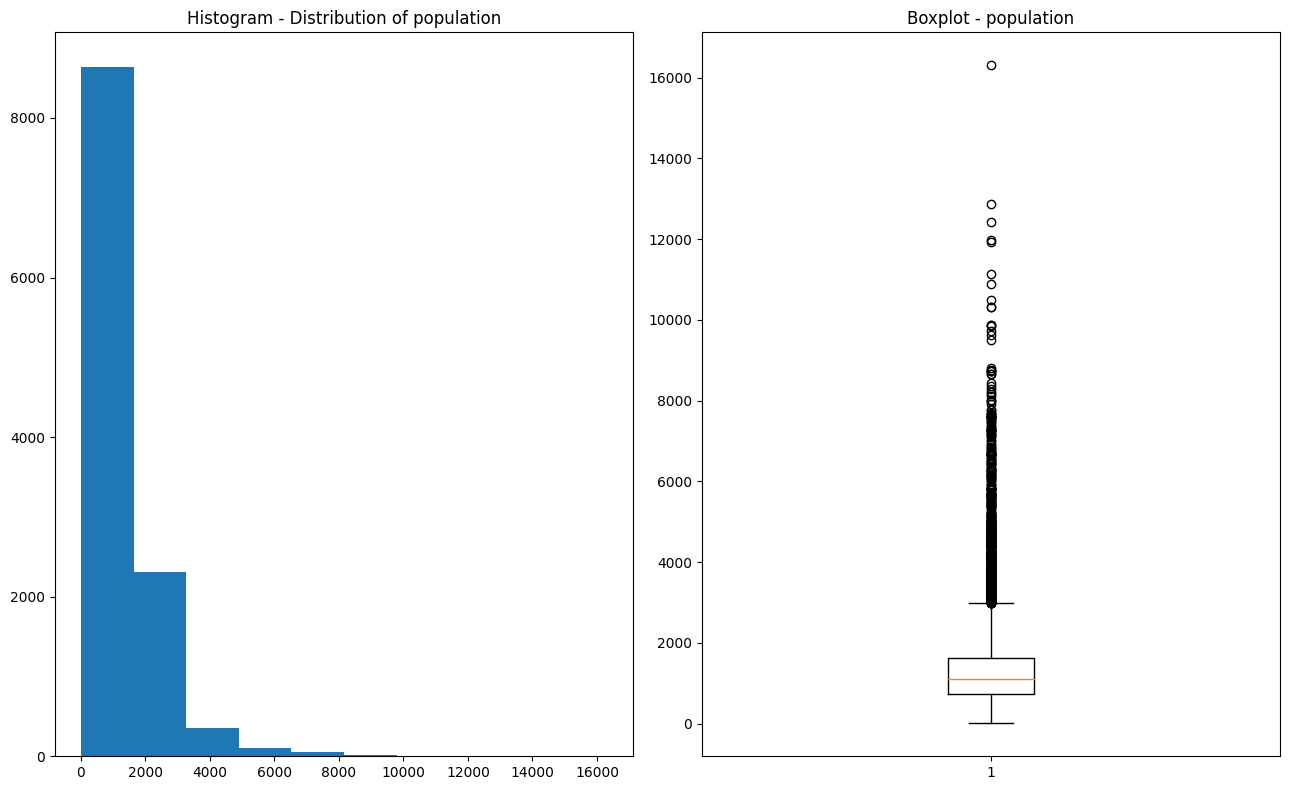

In [ ]:
#make them a subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 8))
ax[0].hist(housing_data['population'])
ax[1].boxplot(housing_data['population'])

#Let's add their respective titles.
ax[0].set_title("Histogram - Distribution of population")
ax[1].set_title("Boxplot - population")

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

## Exercise 3: Hypothesis Testing

#### Problem 1: Here, you will investigate the effect of ocean proximity on the median value of houses within a block.

**Case Study:** The housing market in California is influenced by various factors, and one such factor is the proximity of a house to the ocean. It is commonly believed that houses near the ocean tend to have higher median values compared to houses located further inland. In this examination, we will investigate whether there is a significant difference in the median house values based on the ocean proximity.

As a data scientist, investigate the hypothesis that houses located near the ocean have a higher median house value compared to houses located further inland in California. You are going to conduct a hypothesis test with the following null and alternative hypotheses:



**Exercise 3.1.1:** Design a null and alternative hypothesis for this problem.


- **Null Hypothesis**: There is no significant difference in the median house values based on the ocean proximity.
- **Alternative Hypothesis**: The proximity to the ocean has a significant impact on the average housing prices in California.

**Exercise 3.1.2:** What measure do you think is a perfect choice for a test statistic?

**Test statistic choice:** A suitable test statistic for investigating the impact of ocean proximity on median house values in California is the difference in median house values between houses near the ocean and houses further inland. By comparing this difference to the null hypothesis, which assumes no significant difference in median house values based on ocean proximity, we can determine if there is evidence to support the alternative hypothesis that proximity to the ocean has a significant impact on housing prices in California.

**Exercise 3.1.3:** Verify the claim made by the company using hypothesis testing and a confidence level of 98%. Compute the p-value.

In [ ]:
# Define the groups based on ocean proximity
near_ocean_group = housing_data[housing_data['ocean_proximity'] == 'NEAR_OCEAN']
inland_group = housing_data[housing_data['ocean_proximity'] == 'INLAND']

#Perform Hypothesis test
import statsmodels.api as sm
test_statistic, p_value, _ = sm.stats.ttest_ind(near_ocean_group['median_house_value'],inland_group['median_house_value'],)
print(p_value)

In [ ]:
near_ocean_group.isnull().sum()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

**Exercise 3.1.4:** What will be your conclusion based on the p-value obtained from your analysis?

1. The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.
2. The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
3. The p-value we observed is below the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
4. The p-value we observed is above the 5% cutoff, so we conclude that the data support the alternative hypothesis.

Assign `conclusion_1` to the number corresponding to your answer.

In [ ]:
conclusion_1 = #YOUR ANSWER HERE

## Exercise 4: Modeling

A real estate company seeks to develop a predictive model to aid their understanding of the principles behind the increasing prices of houses in california. To understand what the median house value might be, the company believes a regression model capable of estimating house value with minimum error is required.

As a data scientist, you are tasked with the responsibility of developing a multiple linear regression model using their data.

**Exercise 4.1 Encoding Categorical Variables**

Remember machine learning model can only process and take in numerical values as inputs. We still have a categorical variable in our dataset: `ocean_proximity`. You will need to encode such variables when working with machine learning models.

Encoding categorical variables is necessary in many data analysis and modeling tasks due to several reasons. Categorical variables, which represent qualitative attributes or groups, need to be encoded into numerical form to be effectively utilized by machine learning algorithms and statistical models. Encoding allows for the inclusion of categorical variables in mathematical operations and facilitates meaningful comparisons and interpretations. Additionally, encoding enables algorithms to recognize patterns and relationships in categorical data, thus improving the accuracy and performance of models.

#### One-Hot Encoding

One-hot encoding is a popular technique used to convert categorical variables into a numerical representation. It creates new binary columns, also known as dummy variables, for each unique category in the original variable. In one-hot encoding, for each observation in the dataset, a `1` is placed in the corresponding category column, indicating the presence of that category, while `0` is placed in all other category columns. This representation allows machine learning algorithms to interpret categorical variables as numerical inputs.

**How does One-Hot Encoding Work?**

For example, let's say we have a categorical variable `Color` with three categories: `Red, Green, and Yellow`. After applying one-hot encoding, we would create three new columns: `Color_Red`, `Color_Green`, and `Color_Blue`. If an observation has the color Red, the `Color_Red` column will have a value of `1`, while the `Color_Green` and `Color_Blue` columns will have values of `0`.

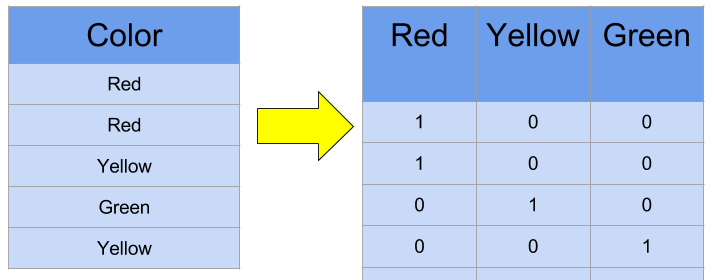

**It is particularly useful when the categories do not have a natural numerical order or when all categories are equally important. However, one-hot encoding can lead to a high number of columns and potential issues with multicollinearity (when the new columns are highly correlated with each other). Therefore, it's important to consider the trade-off between interpretability and the impact on model complexity when applying one-hot encoding.**

The easiest way to perform one-hot encoding is by using the [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function from the pandas library.

In [ ]:
housing_data_new = pd.get_dummies(housing_data)
housing_data_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

This has created three additional columns representing the categories in the `ocean_proximity` variable: `ocean_proximity_INLAND`,
       `ocean_proximity_NEAR BAY`, `ocean_proximity_NEAR OCEAN`. After encoding categorical variables, the `get_dummies()` function drops the original column `ocean_proximity` contgaining the raw categories.


**Exercise 4.2: Train and Test sets**

 Next, you are required to divide your dataset into training and testing set in the ratio 80:20. Remember that the column `median_house_value` is the target variable.

In [ ]:
from sklearn.model_selection import train_test_split
predictors = housing_data_new.drop(['median_house_value'],1)
target = housing_data_new['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    predictors.values, target.values, test_size=0.2, random_state=13
)

<ipython-input-36-277ccade4210>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = housing_data_new.drop(['median_house_value'],1)


**Exercise 4.3: Feature Scaling**

Now, that you have divided your dataset into training and testing portions.It is important to remember that scaling the features present in your data is very crucial to obtain accurate results. Your task here is to standardize the features in each portion of the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Exercise 4.5: Linear Regression**

Develop a linear regression model on the training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#fit model on training set
model.fit(X_train_scaled,y_train)

LinearRegression()

**Exercise 4.6:** Use your newly trained model to predict on the test set. Additionally, evaluate the performance of your model on the test using the mean squared error and mean absolute error measures.

In [ ]:
prediction = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE = mean_squared_error(prediction,y_test)
MAE = mean_absolute_error(prediction, y_test)

print("MAE",MAE)
print("MSE",MSE)

MAE 48251.47917851
MSE 4419687316.561684


## Part 2: Classification: A Case study of loan default prediction.

Loan defaulting is a significant issue in the financial industry, impacting both lenders and borrowers. Defaults occur when borrowers fail to repay their loans, leading to financial losses and potential instability in the financial system. To mitigate this risk, it is essential to understand the factors contributing to loan defaults.

The `loan default` dataset consists of several customer characteristics which are believed to influence loan defaulting. By considering these factors, lenders can minimize default risks and promote responsible lending practices.

The features in this dataset includes:
- `Income`:	Income of the user
- `Age`:	Age of the user
- `Experience`:	Professional experience of the user in years
- `Profession`:	Profession
- `Marital Status`:	Whether married or single
- `House_Ownership`:	Owned or rented or neither
- `Car_Ownership`:	Does the person own a car
- `Risk_Flag`:	Defaulted on a loan
- `Current_Job_Yrs`:	Years of experience in the current job
- `Current_House_Yrs`:	Number of years in the current residence

Here we will load the dataset:

In [ ]:
loan_data = pd.read_csv('loan_default.csv')
loan_data.head()

,Income,Age,Experience,Marital Status,House_Ownership,Car_Ownership,Current_Job_Yrs,Current_House_Yrs,Risk_Flag
0,1020861,42,17,single,rented,no,7,14,1
1,2499276,21,0,single,rented,no,0,12,1
2,9241363,62,18,single,rented,yes,5,11,1
3,7059372,43,4,married,owned,no,4,13,1
4,3957826,78,13,single,rented,no,11,11,1


## Exercise 5: Exploratory Data Analysis

**Exercise 5.1:** Investigate the nature of your data, are there missing values in the dataset? If there are, how many missing values are there in the each column?

In [ ]:
loan_data.isnull().sum()

Income               0
Age                  0
Experience           0
Marital Status       0
House_Ownership      0
Car_Ownership        0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64

**Exercise 5.2:** Identify the numerical and categorical

In [ ]:
#Get numerical columns variables in the dataset.
loan_data.select_dtypes(include=np.number).columns.tolist()

['Income',
 'Age',
 'Experience',
 'Current_Job_Yrs',
 'Current_House_Yrs',
 'Risk_Flag']

In [ ]:
loan_data.select_dtypes(include="object").columns.tolist()

['Marital Status', 'House_Ownership', 'Car_Ownership']

**Exercise 5.3:** Can you visualize the distribution of categories in the `Marital Status` using a pie chart?

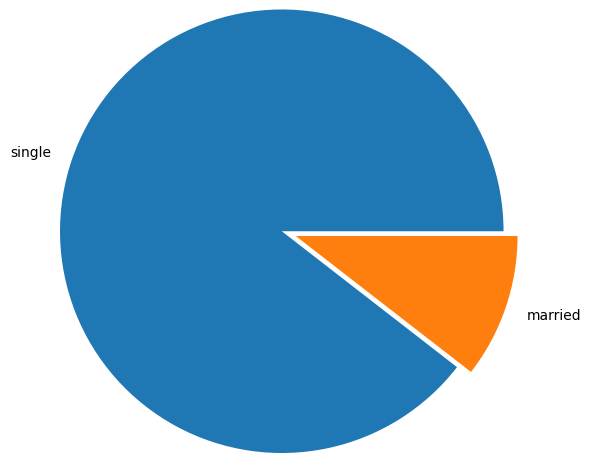

In [ ]:
marital_status_categories = ["single", "married"]
data = loan_data['Marital Status'].value_counts().values

explode = [0.1, 0]
plt.pie(x=data, labels= marital_status_categories, explode=explode, radius=1.5)
plt.show()

**Exercise 5.3: Confidence Interval**

What is the average age of married clients who defaulted on loan repayment. Can you compute the confidence interval for this measure with a confidence interval of 95%?

In [ ]:
married = loan_data[loan_data['Marital Status'] == "married"]
defaulted_married = married[married['Risk_Flag'] == 1]
average_age = defaulted_married['Age'].mean()

print("Mean age of married people who have defaulted on loan repayment:",average_age)

# Calculate the confidence interval using statsmodels
confidence_interval = sm.stats.DescrStatsW(defaulted_married['Age']).tconfint_mean(alpha=0.05)

print("Confidence Interval:", confidence_interval)

Mean age of married people who have defaulted on loan repayment: 47.84090909090909
Confidence Interval: (43.207801761491716, 52.47401642032647)


## Exercise 6: Hypothesis Testing

#### Problem 3: Here, you will investigate the relationship between marital status and loan default rates.

**Case Study:** You are a data scientist working for a financial institution that provides loans to individuals. The institution wants to investigate whether there is a significant difference in loan default rates between married and single individuals.

In this case, you will examine the relationship between marital status (married vs. single) and the risk of loan default within a given population. The institution believes that marital status has no effect on loan default risk. You are expected to verify their claim using hypothesis testing.




**Exercise 6.1:** Design a null and alternative hypothesis for this problem.


- **Null Hypothesis:** There is no significant difference between the default rate in married and single individuals.
- **Alternative Hypothesis:** single individuals have a significantly higher default rate than married individuals.

**Exercise 6.2:** What measure do you think is a perfect choice for a test statistic?

**Test statistics of choice:** To conduct an hypothesis test using the loan default dataset, you will divide the dataset into two groups: married individuals (Group A) and single individuals (Group B). The test statistic used in this test will be the difference in between the proportion of married and single customers who defaulted.

For each group, you will count the number of defaulters (Risk_Flag = 1) and divide it by the total number of individuals in that group. The difference in these proportion will serve as the test statistic.

**Exercise 6.3:** Verify the claim made by the company using hypothesis testing and a confidence level of 98%. Compute the p-value.

In [ ]:
# Define the groups based on marital status
married_group = #YOUR SOLUTION HERE
single_group = #YOUR SOLUTION HERE

**Exercise 6.4:** What will be your conclusion based on the p-value obtained from your analysis?

1. The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.
2. The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
3. The p-value we observed is below the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
4. The p-value we observed is above the 5% cutoff, so we conclude that the data support the alternative hypothesis.

Assign `conclusion_3` to the number corresponding to your answer.

In [ ]:
conclusion_3 = #YOUR SOLUTION HERE

#### Exercise 7: Classification: Loan default prediction!

Now the financial instituton wants you to develop a classification model that predicts the tendency of a customer defaulting on loan repayment if approved. To classify these customers, the institution has provided you with access to data containing customer behaviour and demographics.

**Exercise 7.1 Encoding Categorical Variables**

Here, you will encode the categories present in the categorical variables. This is because computer algorithms only understand number (floats and integers) and not strings.

In [ ]:
loan_data_new = pd.get_dummies(loan_data)
loan_data_new.columns

Index(['Income', 'Age', 'Experience', 'Current_Job_Yrs', 'Current_House_Yrs',
       'Risk_Flag', 'Marital Status_married', 'Marital Status_single',
       'House_Ownership_norent_noown', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_no', 'Car_Ownership_yes'],
      dtype='object')

**Exercise 7.2:** Before you start building the classifier, you need to split the dataset into different portions. Remember that our objective is to build a classifier using customer data for which we know the associated label.

- Your task is to split the dataset into two portions: `training` and `testing` sets. Create a testing set with 75% of the data and 25% for the test set. Remember to stratify the target while splitting.

In [ ]:
from sklearn.model_selection import train_test_split
predictors = loan_data_new.drop(['Risk_Flag'],1)
target = loan_data_new['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(
    predictors.values, target.values, test_size=0.25, random_state=35, stratify=target,
)

<ipython-input-55-6f7c4d7d3b19>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = loan_data_new.drop(['Risk_Flag'],1)


**Exercise 7.3: KNearest Neighbors Classifier**

Develop a KNN model on the training dataset. `k` can be any integer, but an odd value is typically recommended for ease of handling ties.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Exercise 7.4: Model Evaluation and Prediction**

Evaluating our model is very crucial. This is the reason why we dicided our dataset in the first place! Can you make predictions for patients in the test set. Additionally, you are to evaluate the performance of your classifier  on the test set using accuracy?

In [ ]:
#make predictions
predictions = KNN_classifier.predict(X_test)

#evaluate model performance
from sklearn.metrics import accuracy_score
print(f"Accuracy on test set: {accuracy_score(y_test,predictions)}")

Accuracy on test set: 0.595


**Exercise 7.5:** Do you think that there is an optimal value of k?? Investigate and obtain the optimal value of k within the range of (1,8) for which a k-Nearest Neighbor classifier would predict best.
Assign the value to `optimal_k`.

In [ ]:
#Your solution here
accuracy = []
for k in range(1,9):
    KNN_classifier = KNeighborsClassifier(n_neighbors=k)
    KNN_classifier.fit(X_train, y_train)
    predictions = KNN_classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))

optimal_k = np.argmax(accuracy)+1
print(f"Optimal K: {optimal_k},Test accuracy: {accuracy[optimal_k-1]}")

Optimal K: 4,Test accuracy: 0.6275


In [ ]:
accuracy

[0.5975, 0.625, 0.5975, 0.6275, 0.595, 0.605, 0.5625, 0.5875]

Congratulations! We have dealt extensively with data analysis, visualization, statistical analysis and introductory machine learning.